# "Free-lunch" of Diversification

**Table of contents**<a id='toc0_'></a>    
- 1. [Imports and model class](#toc1_)
- 2. [Import and presentation of data](#toc2_)    
- 3. [Calculation of portfolio weights](#toc3_)
- 4. [Calculating expected daily return and risk associated](#toc4_)
- 5. [Plotting efficient frontier](#toc5_)
- 6. [Conclusion](#toc6_)

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Imports and model class](#toc1_)

In [1]:
#%pip install matplotlib-venn
#%pip install yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# We import the StockData class from the dataproject module
from dataproject import StockData

## 2. <a id='toc2_'></a>[Import and presentation of data](#toc2_)

We want to begin with examining the expected daily returns. Therefore, we need to begin by calculating them. We utilize the adjusted closing price for each day in our calculations. We present the results in both table and figure formats to identify any unexpected outcomes and to gain an understanding of the volatility of the daily returns throughout the 2017-2014 time period.

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Daily Return
count,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1.824000e+03,1823.000000
mean,102.807134,103.929729,101.754317,102.896632,101.144880,1.058799e+08,0.001185
std,54.805248,55.376861,54.256942,54.845197,55.262034,5.365632e+07,0.018777
min,28.950001,29.082500,28.690001,29.004999,26.959066,2.404830e+07,-0.128647
25%,46.929376,47.290626,46.503751,46.973749,44.791511,7.077085e+07,-0.007559
50%,110.451248,112.320000,108.813751,110.389999,108.149414,9.216420e+07,0.000893
75%,151.190002,153.287498,149.927498,151.339996,150.132576,1.261926e+08,0.010544
max,198.020004,199.619995,197.000000,198.110001,197.857529,4.479400e+08,0.119808


,Open,High,Low,Close,Adj Close,Volume,Daily Return
count,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1.824000e+03,1823.000000
mean,124.208224,125.420143,122.937248,124.182253,107.037430,8.634918e+06,0.000536
std,26.894823,27.082769,26.688267,26.912746,31.092688,4.630659e+06,0.019802
min,55.259998,58.490002,51.599998,54.220001,44.864262,1.640100e+06,-0.221248
25%,106.949997,107.762497,105.987499,106.847498,85.871187,5.806175e+06,-0.007709
50%,118.355000,119.255001,117.439999,118.274998,95.171280,7.521250e+06,0.000737
75%,148.097504,149.277496,145.804996,147.580006,141.829571,1.012775e+07,0.008751
max,187.119995,189.679993,186.179993,188.050003,176.953262,5.723100e+07,0.227407


,Open,High,Low,Close,Adj Close,Volume,Daily Return
count,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1.824000e+03,1823.000000
mean,52.584452,52.944232,52.204364,52.576365,47.317078,1.419623e+07,0.000396
std,6.843534,6.883937,6.794504,6.849499,8.971716,6.391772e+06,0.011990
min,38.759998,38.889999,36.270000,37.560001,32.094234,2.996300e+06,-0.096725
25%,46.107500,46.367499,45.860001,46.080002,38.771411,1.025770e+07,-0.004733
50%,53.020000,53.395000,52.565001,53.025000,46.784449,1.288415e+07,0.000693
75%,59.250000,59.650000,58.770000,59.237499,56.848194,1.606878e+07,0.005969
max,67.000000,67.199997,65.720001,66.209999,62.319363,6.784570e+07,0.064796


,Open,High,Low,Close,Adj Close,Volume,Daily Return
count,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1.824000e+03,1823.000000
mean,149.169995,150.257588,148.043805,149.182242,134.852308,7.726653e+06,0.000336
std,17.068344,17.169888,16.975243,17.077461,21.776262,6.861142e+06,0.011975
min,111.930000,112.800003,109.160004,111.139999,91.193710,2.114900e+06,-0.100379
25%,134.005005,134.935001,132.727501,133.937496,115.008251,5.449450e+06,-0.005004
50%,148.455002,149.465004,147.059998,148.284996,132.826385,6.558650e+06,0.000283
75%,163.702499,164.842499,162.482498,163.612499,155.397533,8.211125e+06,0.006020
max,185.100006,186.690002,184.179993,186.009995,174.296127,1.513195e+08,0.079977


,Open,High,Low,Close,Adj Close,Volume,Daily Return
count,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1.824000e+03,1823.000000
mean,31.253618,31.598169,30.907056,31.252812,28.530192,5.827184e+07,0.000574
std,6.209880,6.257163,6.154673,6.201696,6.365921,2.590219e+07,0.020358
min,19.260000,19.670000,17.950001,18.080000,16.262648,1.380540e+07,-0.153974
25%,27.090000,27.402500,26.737500,27.007500,24.091870,4.097392e+07,-0.009170
50%,29.990000,30.240000,29.660000,29.980000,27.035671,5.151200e+07,0.000352
75%,34.412499,34.812501,34.080000,34.470001,32.773074,6.808665e+07,0.010360
max,49.910000,50.110001,49.029999,49.380001,46.190941,2.595458e+08,0.177962


,Open,High,Low,Close,Adj Close,Volume,Daily Return
count,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1.824000e+03,1823.000000
mean,100.278355,101.313048,99.234095,100.279375,96.460252,7.571193e+06,0.000536
std,31.067600,31.354797,30.714940,31.012852,30.937325,4.199420e+06,0.019503
min,50.799999,51.070000,50.349998,50.830002,47.248936,1.821900e+06,-0.128081
25%,77.355000,78.009998,76.199997,77.155003,72.465866,5.251575e+06,-0.008544
50%,98.500000,99.545002,97.720001,98.615002,95.351738,6.578750e+06,0.000365
75%,122.610001,124.085001,120.985003,122.392500,119.779146,8.558225e+06,0.010320
max,176.350006,179.100006,175.500000,177.509995,171.783463,4.817610e+07,0.155314


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


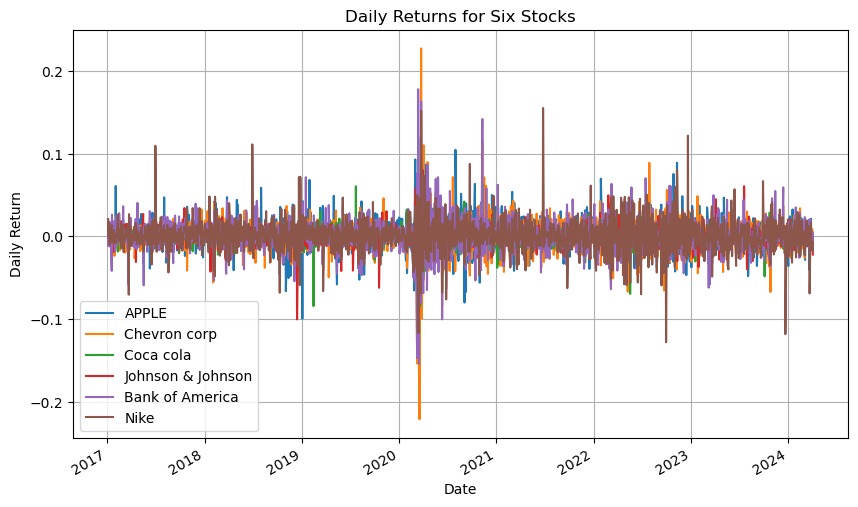

In [3]:
# We create an instance of the StockData class
SD = StockData(['AAPL', 'CVX', 'KO', 'JNJ', 'BAC', 'NKE'], 2017, 2024)

# We are calling this method to calculate daily returns and get the DataFrame
df = SD.six_stocks_()

# We will plot the DataFrame
df.plot(figsize=(10, 6))
plt.title('Daily Returns for Six Stocks')
plt.xlabel('Date')
plt.ylabel('Daily Return')

# We are setting legend labels to ticker symbols
plt.legend(['APPLE', 'Chevron corp', 'Coca cola', 'Johnson & Johnson', 'Bank of America', 'Nike'])
plt.grid(True)
plt.show()

## 3. <a id='toc3_'></a>[Calculation of portfolio weights](#toc3_)

We start by having to solve the minimum variance problem, which is a fundamental concept in portfolio optimization, aiming to find the portfolio with the lowest possible level of risk for a given expected return or the highest expected return for a given level of risk.
Therefore we start by finding the expected returns for each stock in the portfolio. These expected returns represent the average returns that investors anticipate earning from holding each stock over the chosen time period.

Additionally, we calculate the covariance matrix. The covariance measures the degree to which the returns of two stocks move together. A positive covariance indicates that the returns move in the same direction, while a negative covariance indicates they move in opposite directions. The covariance matrix gives us the first sign of whether or not we have benefits from diversifying our portfolio by adding or removing stocks from the portfolio.


In [18]:
# We will set the display precision to 15 decimal points
pd.set_option('display.float_format', '{:.3f}'.format)

# We will call the method to get the filtered DataFrame
expected_returns_df_filtered = SD.expected_return_()

# We are displaying the filtered DataFrame containing the expected returns with company names
display(expected_returns_df_filtered)


,Expected Return (%)
Ticker,
Apple Inc.,0.119
Chevron Corporation,0.054
The Coca-Cola Company,0.040
Johnson & Johnson,0.034
Bank of America Corporation,0.057
"Nike, Inc.",0.054


From the table above we can see that Apple Inc. is the asset in our portfolio that gives us the highest expected daily return of 0,119%, and that the pharmaceutical company Johnson & Johnson gives us the lowest of 0,034%.

In [5]:
# This is the code to where we display the covariance matrix for each portfolio
print("Covariance Matrix for Two Stocks:")
display(SD.calculate_covariance("two"))

print("Covariance Matrix for Four Stocks:")
display(SD.calculate_covariance("four"))

print("Covariance Matrix for Six Stocks:")
display(SD.calculate_covariance("six"))


Covariance Matrix for Two Stocks:


,AAPL,CVX
AAPL,0.000352568381607,0.000127784762302
CVX,0.000127784762302,0.000392115109067


Covariance Matrix for Four Stocks:


,AAPL,CVX,KO,JNJ
AAPL,0.000352568381607,0.000127784762302,0.000087696168656,0.000083040175186
CVX,0.000127784762302,0.000392115109067,0.000099501927024,0.000084511551536
KO,0.000087696168656,0.000099501927024,0.000143752713731,0.000075451195510
JNJ,0.000083040175186,0.000084511551536,0.000075451195510,0.000143389724232


Covariance Matrix for Six Stocks:


,AAPL,CVX,KO,JNJ,BAC,NKE
AAPL,0.000352568381607,0.000127784762302,0.000087696168656,0.000083040175186,0.000165280938034,0.000177928594421
CVX,0.000127784762302,0.000392115109067,0.000099501927024,0.000084511551536,0.000245200980077,0.000142291808269
KO,0.000087696168656,0.000099501927024,0.000143752713731,0.000075451195510,0.000111106222420,0.000093978176054
JNJ,0.000083040175186,0.000084511551536,0.000075451195510,0.000143389724232,0.000090695742604,0.000075580605968
BAC,0.000165280938034,0.000245200980077,0.000111106222420,0.000090695742604,0.000414458251549,0.000182308209110
NKE,0.000177928594421,0.000142291808269,0.000093978176054,0.000075580605968,0.000182308209110,0.000380371940951


For the covariance matrix for the two stocks portfolio we see a covariance between Apple and Chevron Corporation of 0.000127, which means that there is a positive covariance between the returns of the two assets. It tells us that the two stocks tend to move in the same direction but we notice the very small number. Hence there is some level of correlation (but very weak) between the two stocks and their expected return, meaning that if Apple's return is above its average then Chevron Corporation's is also likely to be above its average and vice versa. 

In portfolio management the interpretation would be that a low covariance indicates that the assets are less likely to move in tandem, potentially providing greater diversification benefits and reducing overall portfolio risk.


Next, we need to find the inverse matrices of the covariance matrices found above, create a 1-vector and a z-vector to be able to solve the minimum variance problem. We are seeking the portfolio weights with the smallest possible variance for each of the three portfolios we are working with. 


In [6]:
# This code displays the inverse covariance matrix for each portfolio
print("Invers Covariance Matrix for Two Stocks:")
display(SD.calculate_invers_covariance("two"))

print("Invers Covariance Matrix for Four Stocks:")
display(SD.calculate_invers_covariance("four"))

print("Invers Covariance Matrix for Six Stocks:")
display(SD.calculate_invers_covariance("six"))


Invers Covariance Matrix for Two Stocks:
Number: two


,AAPL,CVX
AAPL,3216.208281737442576,-1048.116742489070020
CVX,-1048.116742489070020,2891.837938868667607


Invers Covariance Matrix for Four Stocks:
Number: four


,AAPL,CVX,KO,JNJ
AAPL,3623.040173668730858,-642.829495465788796,-1192.112737268935007,-1092.024148324700036
CVX,-642.829495465788796,3306.915363062098095,-1477.185674807808482,-799.474646253356582
KO,-1192.112737268934779,-1477.185674807808027,10896.114127012599056,-4172.490997312788750
JNJ,-1092.024148324699809,-799.474646253356582,-4172.490997312788750,10273.164002791181701


Invers Covariance Matrix for Six Stocks:
Number: six


,AAPL,CVX,KO,JNJ,BAC,NKE
AAPL,4213.465324506891193,-131.446918089002935,-649.712163867438676,-934.829907009424119,-672.541256556099825,-1253.164402631585062
CVX,-131.446918089002878,4289.523092378494766,-856.034282308594015,-595.873478971476516,-2017.024304695514957,-246.523768244009148
KO,-649.712163867439131,-856.034282308594015,11436.849054131918820,-4009.164948513523086,-1020.172746047688975,-915.956609281704459
JNJ,-934.829907009424119,-595.873478971476857,-4009.164948513523996,10323.445444415980091,-358.346091887319062,-228.796930540507901
BAC,-672.541256556099597,-2017.024304695514729,-1020.172746047689316,-358.346091887319403,4579.118133294535255,-802.326482361920625
NKE,-1253.164402631585290,-246.523768244009034,-915.956609281704573,-228.796930540507674,-802.326482361920625,3963.739638615063541


In [7]:
# This code displays the one-vector belonging to each portfolio
display(SD.one_vector("two"))
display(SD.one_vector("four"))
display(SD.one_vector("six"))

array([[1.],
       [1.]])

array([[1.],
       [1.],
       [1.],
       [1.]])

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [8]:
# This code displays the z-vector belonging to each portfolio
display(SD.calculate_z_vector("two"))
display(SD.calculate_z_vector("four"))
display(SD.calculate_z_vector("six"))

Number: two


array([[2168.09153925],
       [1843.72119638]])

Number: four


array([[ 696.07379261],
       [ 387.42554654],
       [4054.32471762],
       [4209.1742109 ]])

Number: six


array([[ 571.77067635],
       [ 442.62034007],
       [3985.80830411],
       [4196.43408749],
       [-291.29274825],
       [ 516.97144556]])

In [19]:
# We again set the display to 15 decimal points
pd.set_option('display.float_format', '{:.3f}'.format)

# We get the weights
weights_two = SD.normalize_z_vector("two")
weights_four = SD.normalize_z_vector("four")
weights_six = SD.normalize_z_vector("six")

# We create DataFrames with the weights and the stock names as the index
df_two = pd.DataFrame(weights_two, index=SD.tickers[:2], columns=["Weights of each stock"])
df_four = pd.DataFrame(weights_four, index=SD.tickers[:4], columns=["Weights of each stock"])
df_six = pd.DataFrame(weights_six, index=SD.tickers[:6], columns=["Weights of each stock"])

# We will display the DataFrames
display(df_two)
display(df_four)
display(df_six)

SD.create_pert(expected_returns_df_filtered, df_two, df_four, df_six)


Number: two
Number: four
Number: six


,Weights of each stock
AAPL,0.540
CVX,0.460


,Weights of each stock
AAPL,0.074
CVX,0.041
KO,0.434
JNJ,0.450


,Weights of each stock
AAPL,0.061
CVX,0.047
KO,0.423
JNJ,0.445
BAC,-0.031
NKE,0.055


In [10]:
# This is the code where we check our results, to see if the calculations are correct
display(SD.check_results("two"))
display(SD.check_results("four"))
display(SD.check_results("six"))

Number: two


array([[1.],
       [1.]])

Number: four


array([[1.],
       [1.],
       [1.],
       [1.]])

Number: six


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

Above we have found the portfolio weights for respectively the two stock, four stock and six stock portfolio and further checked if they sum to one.
For example, for the two stock portfolio, it should consist of 54% Apple stocks and 46% Chevron Corporation stocks to get the smallest possible variance for a portfolio consisting of only these two stocks. 
Interestingly, we observe for the six-stock portfolio a negative weight assigned to Bank of America (-0.031). This negative weight suggests that the optimal portfolio allocation involves short-selling Bank of America stock. 


## 4. <a id='toc4_'></a>[Calculating expected daily return and risk associated](#toc4_)

Now that we have determined the portfolio weights that minimize the portfolio variance, we are interested in estimating the expected daily return associated with these portfolio weights for each of the three portfolios. 
Additionally, we seek to assess the level of risk inherent in the portfolios represented by these weights. To accomplish this, we calculate the standard deviation of the variance, which serves as a measure of volatility. 


In [11]:
# This code displays the expected return for each portfolio
print("Expected return for two stock portfolio:")
display(SD.portfolio_expected_return_two)
print("Expected return for four stock portfolio:")
display(SD.portfolio_expected_return_four)
print("Expected return for six stock portfolio:")
display(SD.portfolio_expected_return_six)


Expected return for two stock portfolio:


0.08866722433964759

Expected return for four stock portfolio:


0.04335467398511578

Expected return for six stock portfolio:


0.04259065627875677

In [12]:
# We need to call an instance of the StockData class to calculate the portfolio variances
SD.calculate_portfolio_variances()

# We print the portfolio variances
print("Portfolio variance for two stock portfolio:", SD.portfolio_variance_two)
print("Portfolio variance for four stock portfolio:", SD.portfolio_variance_four)
print("Portfolio variance for six stock portfolio:", SD.portfolio_variance_six)

Portfolio variance for two stock portfolio: 0.0002492638779271111
Portfolio variance for four stock portfolio: 0.0001069862186087157
Portfolio variance for six stock portfolio: 0.00010613106303644807


In [13]:
# We need to call an instance of the StockData class to calculate the portfolio standard deviations
SD.calculate_portfolio_std_devs()

# We print the portfolio standard deviations
print("Portfolio standard deviation for two stock portfolio:", SD.portfolio_std_dev_two)
print("Portfolio standard deviation for four stock portfolio:", SD.portfolio_std_dev_four)
print("Portfolio standard deviation for six stock portfolio:", SD.portfolio_std_dev_six)

Portfolio standard deviation for two stock portfolio: 0.01578809291609063
Portfolio standard deviation for four stock portfolio: 0.01034341426264634
Portfolio standard deviation for six stock portfolio: 0.010301993158435316


Our results show that diversification leads to a decrease in expected daily return, which is not fully in accordance with Harry Markowitz's theory. Notably, the two-stock portfolio outperforms the four and six-stock portfolios in terms of expected daily return. On the other hand our results are in accordance with Markowitz in regards to diversification (inclusion of more assets) reduces your risk, because the standard deviation for the four stock and six stock portfolio both are lower than for the two stock portfolio.

## 5. <a id='toc5_'></a>[Plotting efficient frontier](#toc5_)

Finally, we want to plot the efficient frontier for each of the three portfolios showing the portfolio with the optimal portfolio weights (red dot) and the different levels of volatility and expected return if you chose different portfolio weights than the ones we found to be the optimal ones solving the minimum variance problem. 

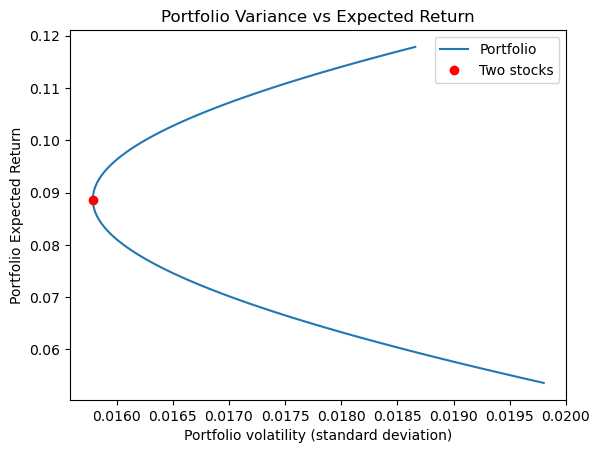

In [14]:
SD.plot_two_stock()

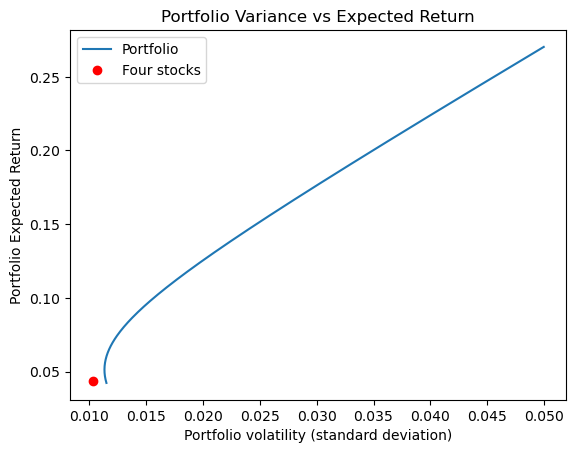

In [15]:
SD.plot_four_stock()

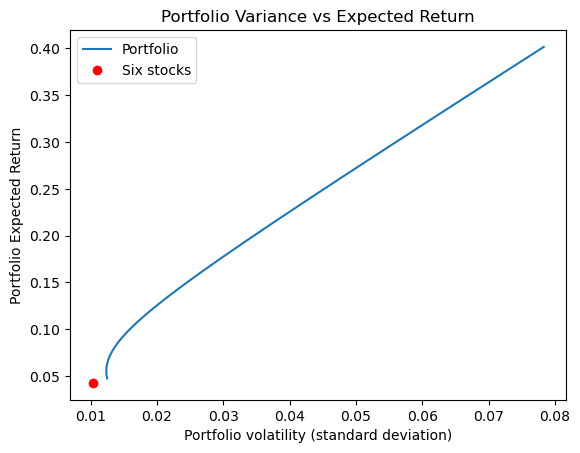

In [16]:
SD.plot_six_stock()

## 6. <a id='toc6_'></a>[Conclusion](#toc6_)

After reviewing our findings, it appears that Harry Markowitz theory holds in terms of risk reduction. However, our project's results indicate a decline in the expected return when comparing a two-stock portfolio to a six-stock portfolio. Nonetheless, we believe that if we were to include even more stocks, say 30, the outcomes would further support his theory. We anticipate that the expected daily returns would converge towards or even exceed those of the two-stock portfolio while concurrently mitigating risk.